In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

Based on these 39 coefficients,
they later apply the Support Vector Machine (SVM) classifier with a polynomial and rbf kernel to classify
the speakers.

In [34]:
audio_data = np.load('audio_data_4_speeches.npy')
audio_data.shape

(6000, 39)

In [35]:
dataset_mfcc = audio_data[:,0:13]
print(dataset_mfcc.shape)
dataset_mfcc_d = audio_data[:,0:26]
print(dataset_mfcc_d.shape)
dataset_mfcc_d_d = audio_data
print(dataset_mfcc_d_d.shape)

(6000, 13)
(6000, 26)
(6000, 39)


In [36]:
fi_s_test_vec = np.concatenate((np.ones(1500),np.zeros(4500)))
se_s_test_vec = np.concatenate((np.zeros(1500),np.ones(1500), np.zeros(3000)))
th_s_test_vec = np.concatenate((np.zeros(3000), np.zeros(1500), np.zeros(1500)))
fo_s_test_vec = np.concatenate((np.zeros(4500), np.ones(1500)))

In [47]:
## divide all the dataset for training and for testing (only mfcc??)
X_train, X_test, y_train, y_test = train_test_split(dataset_mfcc, fi_s_test_vec, test_size=0.4, random_state=1)

### THIS IS 10-FOLD CROSS VALIDATION
With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.

Taking all the values of C and checking out the accuracy score with kernel as linear.

accuracy lin: 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

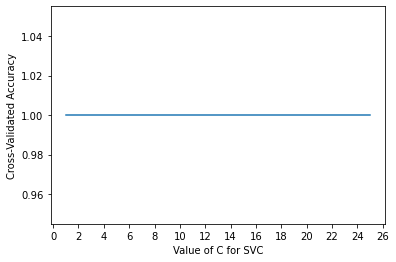

In [61]:
# find best SVC - Linear
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train, y_train)
y_pred = svc_lin.predict(X_test)
print("accuracy lin:", accuracy_score(y_test, y_pred))

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc_lin = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc_lin, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# dovresti analizzare tra 0.1 e max dove hai la punta più alta
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc_lin = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc_lin, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

accuracy poly: 0.9991666666666666
[0.999, 0.9981666666666665, 0.999, 0.9978333333333331, 0.9868333333333332]


Text(0, 0.5, 'Cross-Validated Accuracy')

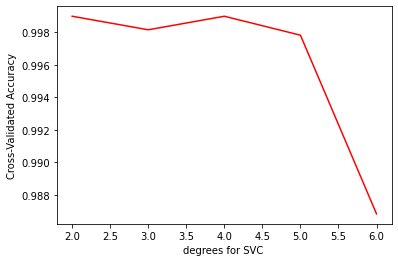

In [58]:
# find best SVC - Poly
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
print("accuracy poly:", accuracy_score(y_test, y_pred))

degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc_poly = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc_poly, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Score is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases.Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting.**

accuracy rbf: 1.0
[1.0, 0.9996666666666666, 0.8983333333333332, 0.7648333333333334, 0.75, 0.75, 0.75]


Text(0, 0.5, 'Cross-Validated Accuracy')

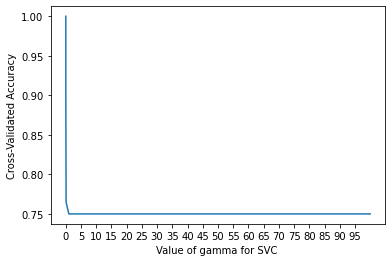

In [59]:
# find best SVC - Rbf
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
print("accuracy rbf:", accuracy_score(y_test, y_pred))

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc_rbf = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc_rbf, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')


[1.0, 0.9996666666666666, 0.8983333333333332, 0.7648333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

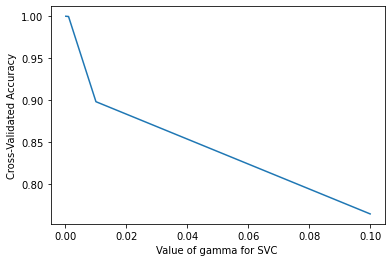

In [63]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc_rbf = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc_rbf, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

[0.8983333333333332, 0.8168333333333333, 0.8003333333333333, 0.7903333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

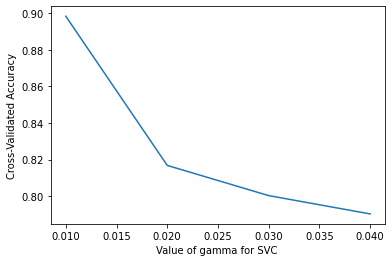

In [64]:
gamma_range=[0.01,0.02,0.03,0.04]
acc_score=[]
for g in gamma_range:
    svc_rbf = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc_rbf, dataset_mfcc, fi_s_test_vec, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# apply your model to predict who is the speaker
predicted_poly = svc_poly.predict(test_data)
predicted_linear = svc_linear.predict(test_data)
predicted_rbf = svc_rbf.predict(test_data)

# Calculate confusion matrix using sklearn
conf_matrix_poly = confusion_matrix(test_labels, predicted_poly)
conf_matrix_linear = confusion_matrix(test_labels, predicted_linear)
conf_matrix_rbf = confusion_matrix(test_labels, predicted_rbf)

print(conf_matrix_poly)
print(conf_matrix_linear)
print(conf_matrix_rbf)

### multiclass SVM (one vs rest)
there are the audio speaker you want that are the positive 
and all other sperkers are negatives   you have to train 1 classifier for each class 

In [ ]:
classif = OneVsRestClassifier(SVC(kernel="linear"))
classif.fit(X, Y)